In [1]:
import rasterio
import numpy as np
from rasterio.crs import CRS

forests_file = rasterio.open('../../Nature/Forests/data/gm_ve_v1.tif')
forests = forests_file.read()

print(np.amin(forests))
print(np.amax(forests))
print(len(np.unique(forests)))

0
254
102


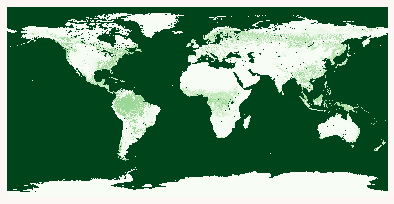

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')

ax = plt.axes()
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests[0],
                  cmap='Greens',
                  interpolation='nearest')

ax.axis('off')
plt.savefig("outputs/raw1.png", dpi=1000, bbox_inches='tight')
plt.show()

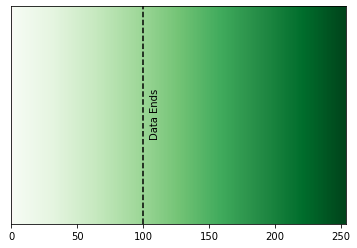

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib import cm

purples = cm.get_cmap('Greens', 254)
newcolors = purples(np.linspace(0, 1, 254))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
#pink = np.array([0,0,0, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

bounds = np.arange(254)
norm_forests = BoundaryNorm(bounds, newcmp_forests.N)

gradient = np.linspace(0, 1, 254)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots()
ax.imshow(gradient, aspect='auto', cmap=newcmp_forests)
ax.get_yaxis().set_visible(False)
ax.axvline(100, ls="--", c='black', )
plt.text(105, 0.7, "Data Ends", rotation=90)

plt.savefig("outputs/raw2.png", dpi=600, bbox_inches='tight')
plt.show()

In [4]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib import cm

forests[0][forests[0] == 254] = 0.0

ourcmap = cm.get_cmap('Greens', 101)
newcolors = ourcmap(np.linspace(0, 1, 101))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

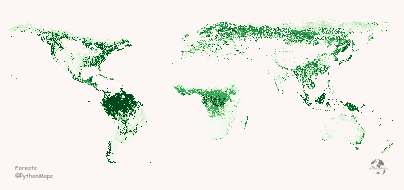

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')

ax = plt.axes()
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests[0],
                  cmap=newcmp_forests,
                  interpolation='nearest')

logo = plt.imread('../../Branding/globe.png')
newax = fig.add_axes([0.8, 0.17, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Forests \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')


ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)
ax.axis('off')
plt.savefig("outputs/raw3.png", dpi=1000, bbox_inches='tight')
plt.show()

In [6]:
import rioxarray as rxr

forests_file = rxr.open_rasterio('../../Nature/Forests/data/gm_ve_v1.tif', masked=True).squeeze()
print("Original projection: ", forests_file.rio.crs)
crs_rob = CRS.from_string('+proj=robin')
forests = forests_file.rio.reproject(crs_rob)
print("New projection: ", forests.rio.crs)
forests = forests.to_numpy()

print(np.amin(forests))
print(np.amax(forests))
print(forests.shape)
print(len(np.unique(forests)))


Original projection:  EPSG:4326
New projection:  PROJCS["unknown",GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Robinson"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
0.0
3.4028235e+38
(21847, 43075)
103


In [7]:
print(np.amin(forests))
print(np.amax(forests))
print(forests.shape)
print(len(np.unique(forests)))


0.0
3.4028235e+38
(21847, 43075)
103


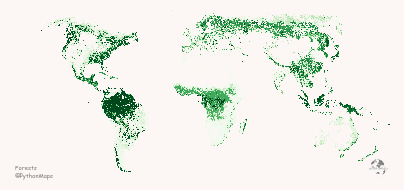

In [8]:
forests[forests > 100] = 0.0


fig = plt.figure(facecolor='#FCF6F5FF')

ax = plt.axes()
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests,
                  cmap=newcmp_forests,
                  interpolation='nearest')
ax.axis('off')
ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)

newax = fig.add_axes([0.8, 0.17, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Forests \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

plt.savefig("outputs/raw4.png", dpi=1000, bbox_inches='tight')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib import cm

purples = cm.get_cmap('gnuplot', 101)
newcolors = purples(np.linspace(0, 1, 101))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

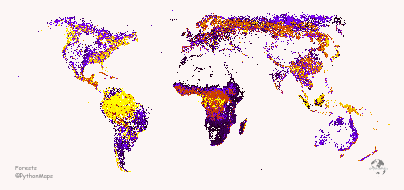

In [10]:
fig = plt.figure(facecolor='#FCF6F5FF')

ax = plt.axes()
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests,
                  cmap=newcmp_forests,
                  interpolation='nearest')
ax.axis('off')
ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)

newax = fig.add_axes([0.8, 0.17, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "Forests \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

plt.savefig("outputs/raw5.png", dpi=1000, bbox_inches='tight')
plt.show()